# FIFA World Cups
ISYS 812 Project

**Importing libraries**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

**Loading data set**

In [3]:
df_fifa = pd.read_csv("./src/fifawc2022/international_matches.csv",
                      parse_dates=["date"], encoding="utf-8")
df_fifa.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


FIFA Confederations

- AFC: Asian Football Confederation 
    - 47 members
    - Founded in 1954, represents Asian nations in football
    - The main tournament is the AFC Asian Cup.
- CAF: Confédération Africaine de Football
    - 54 members + 2 associate
    - Founded in 1957 - represents African nations in football
    - The main tournament is the African Cup of Nations.
- CONCACAF: Confederation of North, Central American and Caribbean Association Football
    - 41 members
    - Founded in 1961 represents North American, Central American and Caribbean nations
    - The main tournament is the CONCACAF Gold Cup.
- CONMEBOL: Confederación Sudamericana de Fútbol 
    - 10 members 
    - Founded in 1916 represents South American nations in football
    - The main tournament is the Copa América.
- OFC: Oceania Football Confederation 
    - 11 members + 2 associate 
    - Founded in 1966 represents Oceanian nations in football
    - The main tournament is the OFC Nations Cup.
- UEFA: Union of European Football Associations 
    - 55 members 
    - Founded in 1954 represents European nations in football
    - The main tournament is the UEFA European Championship, also known as UEFA Euro.

## 1. Worldwide tournaments previous to FIFA World Cup Qatar 2022

An overview of the international competitions from around the world that have taken place between the previous World Cup and the current one.

In [4]:
post_2018 = df_fifa[(df_fifa["date"].dt.year >= 2019)]

prev_comp = post_2018[["tournament", "home_team_continent"]]
prev_comp = prev_comp[~prev_comp["tournament"]
                      .isin(["Friendly", "Superclásico de las Américas", "FIFA World Cup qualification"])]
# prev_comp.drop_duplicates().sort_values(by="tournament").to_excel("./src/fifawc2022/Tournaments_Continents_Key.xlsx", index=False)

competitions = pd.read_excel("./src/fifawc2022/Tournaments_Continents_Key.xlsx")
comp_cont = competitions.groupby(["tournament_continent"]).count().reset_index()
comp_cont.columns = ["Continent", "Count"]

comp_cont["Pct"] = round(comp_cont["Count"] / comp_cont["Count"].sum(), 2)
comp_cont

,Continent,Count,Pct
0,Africa,7,0.25
1,Asia,11,0.39
2,Europe,4,0.14
3,North America,4,0.14
4,Oceania,1,0.04
5,South America,1,0.04


**Plot**

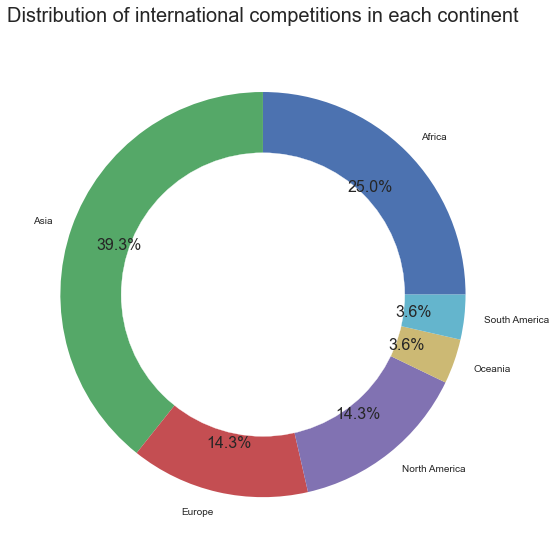

In [80]:
# Create a circle at the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='#fff')

fig = plt.figure(figsize=(10, 8))
plt.style.use("seaborn")
plt.pie(comp_cont["Count"], labels=comp_cont["Continent"],
        autopct="%.1f%%", pctdistance=0.75)

# aesthetics
plt.rcParams.update({"font.size": 16})

# adding inner circle to make the pie chart a donut
p = plt.gcf()
p.gca().add_artist(my_circle)

# titles and labels
plt.title("Distribution of international competitions in each continent",
          fontsize=20, pad=20, loc="left")

plt.tight_layout()

plt.show()

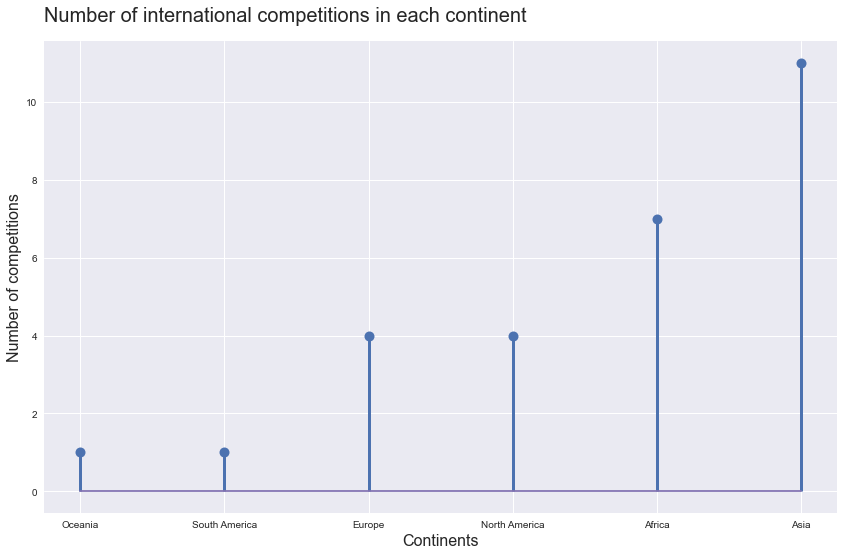

In [81]:
lollipop = comp_cont.sort_values("Count")
lolli_range = range(0, len(lollipop["Continent"]))

fig = plt.figure(figsize=(12, 8))
plt.xticks(lolli_range, lollipop["Continent"])

# stem and marker styles
markerline, stemlines, baseline = plt.stem(lollipop["Count"])
plt.setp(stemlines, "linewidth", 3)
plt.setp(markerline, "markersize", 10)

plt.title("Number of international competitions in each continent",
          fontsize=20, pad=20, loc="left")
plt.xlabel('Continents', fontsize=16)
plt.ylabel('Number of competitions', fontsize=16)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.tight_layout()

plt.show()

## 2. Major continental tournaments

Getting data from all major continental tournaments previous to the oncoming World Cup

In [8]:
uefa_euro = df_fifa[((df_fifa["tournament"] == "UEFA Euro")
                    & (df_fifa["date"].dt.year == 2021))]

copa_america = df_fifa[((df_fifa["tournament"] == "Copa América") 
                    & (df_fifa["date"].dt.year == 2021))]

gold_cup = df_fifa[((df_fifa["tournament"] == "Gold Cup")
                    & (df_fifa["date"].dt.year == 2021))]

african_cup = df_fifa[((df_fifa["tournament"] == "African Cup of Nations")
                    & (df_fifa["date"].dt.year == 2022))]

asian_cup = df_fifa[((df_fifa["tournament"] == "AFC Asian Cup")
                    & (df_fifa["date"].dt.year == 2019))]

uefa_euro = uefa_euro.assign(continent="Europe")
copa_america = copa_america.assign(continent="South America")
gold_cup = gold_cup.assign(continent="North America")
african_cup = african_cup.assign(continent="Africa")
asian_cup = asian_cup.assign(continent="Asia")

lst_trmnts = [uefa_euro, copa_america, gold_cup, african_cup, asian_cup]

### Top 5 strongest teams by FIFA Ranking

In [9]:
def top_n(dataset, n):
    # selecting all the necessary columns to rank the teams
    rank = dataset[[
        'date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', "continent"]]

    # renaming columns
    home = rank[['date', 'home_team', 'home_team_fifa_rank', "continent"]]\
        .rename(columns={
            'home_team': 'team',
            'home_team_fifa_rank': 'rank'
        })
    away = rank[['date', 'away_team', 'away_team_fifa_rank', "continent"]]\
        .rename(columns={
            'away_team': 'team',
            'away_team_fifa_rank': 'rank'
        })
    rank = home.append(away)

    # select for each country the latest match
    rank = rank.sort_values(['team', 'date'],
                                  ascending=[True, False])
    rank['row_number'] = rank.groupby('team').cumcount()+1
    rank_top = rank[rank['row_number'] == 1]\
        .drop('row_number', axis=1)\
        .nsmallest(n, 'rank')
    rank_top = rank_top.reset_index()
    rank_top = rank_top[["team", "rank"]]
    # rank_top = rank_top[["team", "rank", "continent"]]

    return rank_top


In [10]:
# ranks = []
# for i in range(0, len(lst_trmnts)):

ranks = [top_n(trmnt, 5) for trmnt in lst_trmnts]
ranks = pd.concat(ranks)
# ranks.to_csv("./src/fifawc2022/ranks.csv", index=False)

**UEFA Euro 2020**

In [11]:
top_n(uefa_euro, 5)

,team,rank
0,Belgium,1
1,France,2
2,England,4
3,Portugal,5
4,Spain,6


**CONMEBOL Copa America 2021**

In [12]:
top_n(copa_america, 5)

,team,rank
0,Brazil,3
1,Argentina,8
2,Uruguay,9
3,Colombia,15
4,Chile,19


**CONCACAF Gold Cup 2021**

In [13]:
top_n(gold_cup, 5)

,team,rank
0,Mexico,11
1,USA,20
2,Jamaica,45
3,Costa Rica,50
4,Qatar,58


**CAF Cup of Nations**

In [14]:
top_n(african_cup, 5)

,team,rank
0,Senegal,20
1,Morocco,28
2,Algeria,29
3,Tunisia,30
4,Nigeria,36


**AFC Asian Cup**

In [15]:
top_n(asian_cup, 5)

,team,rank
0,IR Iran,29
1,Australia,41
2,Japan,50
3,Korea Republic,53
4,Saudi Arabia,69


### Number of goals scored in each major continental tournament

In [16]:
def sum_goals(dataset):
    return dataset[["home_team_score", "away_team_score"]].sum().sum()


# Getting total goals for each tournament
tournaments_df = [uefa_euro, copa_america, asian_cup, african_cup, gold_cup]
last_trmnts = []
for trmnt in tournaments_df:
    temp = {}
    temp["continent"] = trmnt["continent"].iloc[0]
    temp["n_goals"] = sum_goals(trmnt)
    last_trmnts.append(temp)

last_trmnts = pd.DataFrame(last_trmnts)
last_trmnts


,continent,n_goals
0,Europe,142
1,South America,65
2,Asia,130
3,Africa,100
4,North America,64


**Plot**

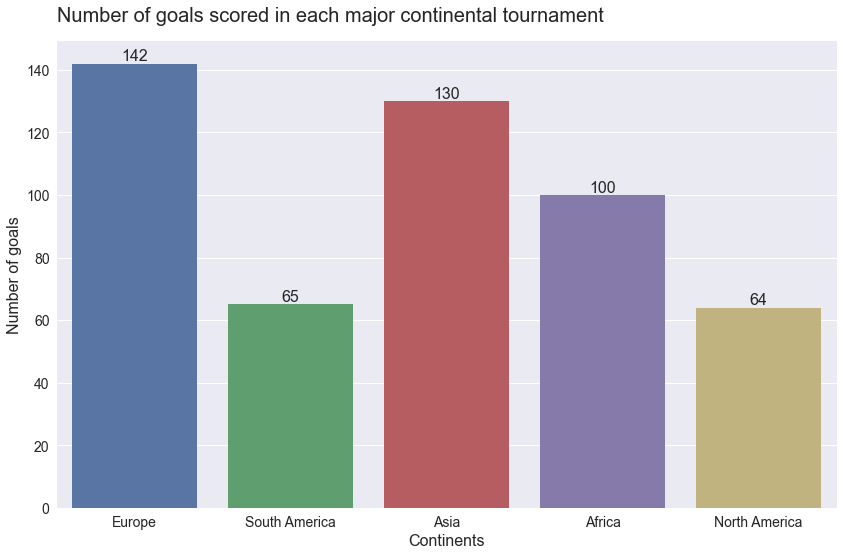

In [85]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x="continent",
    y="n_goals",
    data=last_trmnts
)

ax.bar_label(ax.containers[0])
plt.title("Number of goals scored in each major continental tournament",
          fontsize=20, pad=20, loc="left")
plt.xlabel("Continents", fontsize=16)
plt.ylabel("Number of goals", fontsize=16)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.tight_layout()

plt.show()


### Averages position scores by continent

In [18]:
def get_stats(trmnt):
    home_stats = trmnt[["home_team", "home_team_mean_offense_score", "home_team_mean_midfield_score",
                        "home_team_mean_defense_score", "home_team_goalkeeper_score", "continent"]]
    away_stats = trmnt[["away_team", "away_team_mean_offense_score", "away_team_mean_midfield_score",
                        "away_team_mean_defense_score", "away_team_goalkeeper_score", "continent"]]
    return concat_stats(home_stats, away_stats)


def concat_stats(home_stats, away_stats):
    home_stats.columns = ["team", "offense", "midfield",
                          "defense", "goalkeeper", "continent"]
    away_stats.columns = ["team", "offense", "midfield",
                          "defense", "goalkeeper", "continent"]
    return pd.concat([home_stats, away_stats]).drop_duplicates().reset_index(drop=True)


lst = []
for trmnt in lst_trmnts:
    lst.append(get_stats(trmnt))

cont_stats = pd.concat(lst).reset_index(drop=True)

cont_stats = cont_stats.groupby("continent").mean().reset_index()
# cont_stats = cont_stats.melt(id_vars="continent",
#                              value_vars=["offense", "midfield", "defense", "goalkeeper"])

# cont_stats["value"] = cont_stats["value"].apply(lambda x: round(x, 1))
# cont_stats.columns = ["continent", "position", "stat"]

cont_stats.head()


,continent,offense,midfield,defense,goalkeeper
0,Africa,74.883333,74.105882,72.800000,71.545455
1,Asia,70.787500,71.444444,70.600000,71.666667
2,Europe,78.475000,80.370833,78.920833,81.666667
3,North America,73.800000,70.800000,71.828571,74.285714
4,South America,78.430000,78.290000,76.990000,77.300000


**Plot**

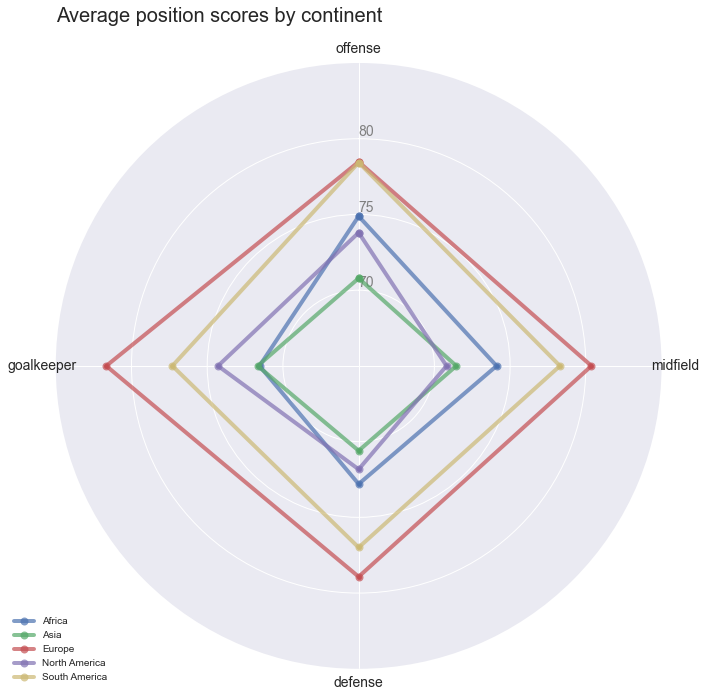

In [90]:
# ------- Create background

# number of variable
categories = list(cont_stats)[1:]
N = len(categories)

# angle of each axis in the plot (plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# initializing the spider plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, polar=True)

# first axis on top
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)

# drawing one axe per variable + adding labels
plt.xticks(angles[:-1], categories)

# drawing ylables
ax.set_rlabel_position(0)
# plt.yticks([10, 20, 30], ["10,"])
plt.yticks([70, 75, 80], color="gray")
plt.ylim(65, 85)

# ------- Add plots

# Plot each individual = each line of the data

for i in range(0, len(cont_stats)):
    values = cont_stats.loc[i].drop('continent').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, "o",
            linewidth=4,
            linestyle='solid',
            label=cont_stats["continent"].loc[i],
            alpha=0.7,
            markersize=8)
    # ax.fill(angles, values, alpha=0.05)
    ax.scatter(angles, values, s=20)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add title
plt.title("Average position scores by continent", fontsize=20, pad=20, loc="left")

plt.tight_layout()

plt.show()


## 3. World Cup Qualifiers accross the continental confederations (pending)

In [20]:
wcq = df_fifa[((df_fifa["date"].dt.year >= 2019) & (df_fifa["tournament"] == "FIFA World Cup qualification"))]
wcq

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
21128,2019-06-06,Bhutan,Guam,Asia,Asia,186,193,917,907,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21129,2019-06-06,Cambodia,Pakistan,Asia,Asia,173,200,967,888,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21130,2019-06-06,Laos,Bangladesh,Asia,Asia,184,188,923,909,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21131,2019-06-06,Macau,Sri Lanka,Asia,Asia,183,202,925,886,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21132,2019-06-06,Mongolia,Brunei Darussalam,Asia,Asia,187,194,915,903,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23634,2022-03-30,Solomon Islands,New Zealand,Oceania,Oceania,142,111,1072,1161,0,...,No,Lose,NaN,68.0,NaN,NaN,NaN,70.2,70.7,69.2
23654,2022-06-01,Scotland,Ukraine,Europe,Europe,39,27,1472,1535,1,...,No,Lose,77.0,75.0,79.2,74.0,77.5,74.8,78.7,80.0
23723,2022-06-05,Wales,Ukraine,Europe,Europe,18,27,1588,1535,1,...,No,Win,74.0,75.0,75.0,73.0,78.5,74.8,78.7,80.0
23876,2022-06-13,Australia,Peru,Oceania,South America,42,22,1462,1562,0,...,Yes,Win,77.0,74.0,72.0,72.3,73.5,74.5,73.0,76.8


## 4. FIFA Ranking from 2018 to 2022

In [21]:
# re-shaping the data
fifa_rank = df_fifa[['date', 'home_team', 'away_team',
                     'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank']]\
    .rename(columns={'home_team': 'team', 'home_team_fifa_rank': 'rank'})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank']]\
    .rename(columns={'away_team': 'team', 'away_team_fifa_rank': 'rank'})
fifa_rank = home.append(away)

# select for each country the latest match
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])

# get the ranking for each year
fifa_rank["year"] = fifa_rank["date"].dt.year
fifa_rank['row_number'] = fifa_rank.groupby(['team', "year"]).cumcount()+1
fifa_rank = fifa_rank[fifa_rank['row_number'] == 1].drop('row_number', axis=1)
fifa_rank = fifa_rank.sort_values(["year", "rank"], ascending=[False, True])

fr_2021 = fifa_rank.loc[fifa_rank["year"] == 2021, "rank"]
fr_2021 = fr_2021.apply(lambda x: x-1 if x > 9 else x)
fifa_rank.loc[fifa_rank["year"] == 2021, "rank"] = fr_2021

# select the top 20 strongest teams for each year -> BUT ONLY 10 WILL BE SHOWED
fifa_rank_top_10 = fifa_rank.groupby("year").apply(lambda x: x.nsmallest(20, 'rank')).reset_index(drop=True)
fifa_rank_top_10

# select ranking for the last 5 years
years_range = range(2022-4, 2022+1)
fifa_rank_top_10 = fifa_rank_top_10[fifa_rank_top_10["year"].isin(years_range)].drop("date", axis=1)
fifa_rank_top_10


,team,rank,year
500,Belgium,1,2018
501,France,2,2018
502,Brazil,3,2018
503,Croatia,4,2018
504,England,5,2018
...,...,...,...
595,Croatia,16,2022
596,Colombia,17,2022
597,Wales,18,2022
598,Sweden,19,2022


In [22]:
# Get the n top ranked of last edition (for labelling)
n_top_ranked = 10
top_teams = fifa_rank_top_10[fifa_rank_top_10["year"] == fifa_rank_top_10["year"].max()].nsmallest(n_top_ranked, "rank")
top_teams

,team,rank,year
580,Brazil,1,2022
581,Belgium,2,2022
582,France,3,2022
583,Argentina,4,2022
584,England,5,2022
585,Italy,6,2022
586,Spain,7,2022
587,Portugal,8,2022
588,Mexico,9,2022
589,Netherlands,10,2022


**Plot**

In [23]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def get_flag(name):
    path = "./src/fifawc2022/flags/{}.png".format(name)
    im = plt.imread(path)
    return im


def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax

    ab = AnnotationBbox(im, (0, coord+1),  xybox=(24, -1.7), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)


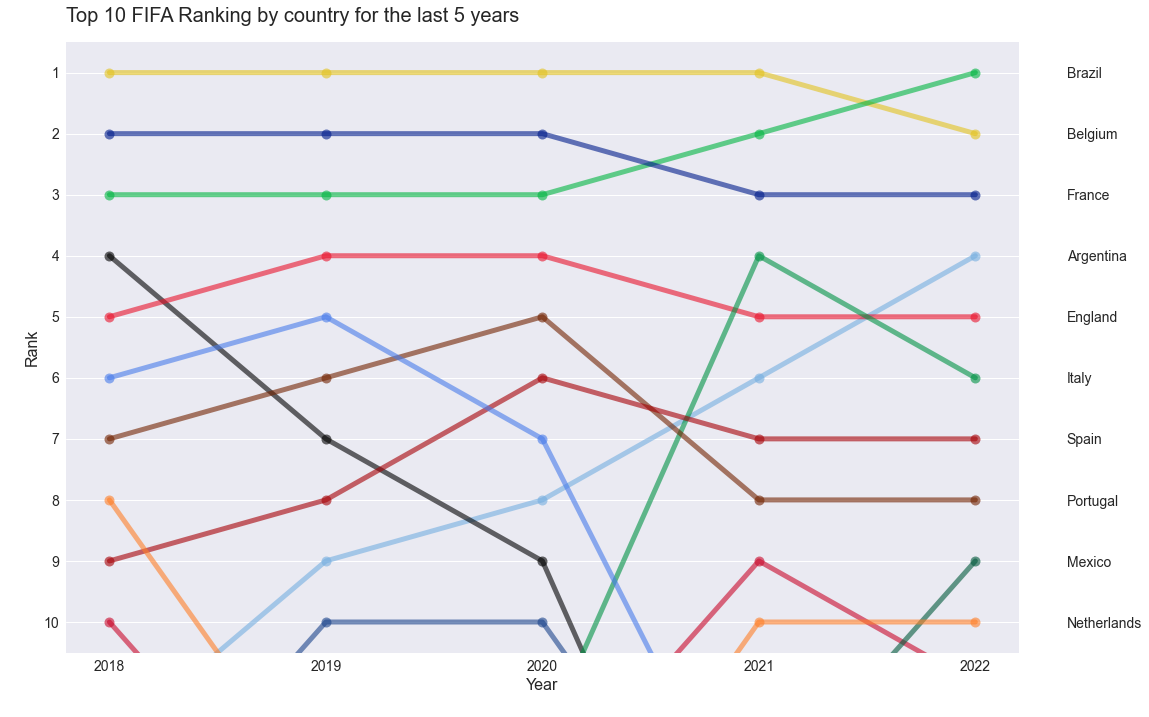

In [91]:
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

COLOR_SCALE = [
    "#75AEE0",  # ARG
    # "#FDDA25", #BEL
    "#e3c21d",  # BEL
    "#00b540",  # BRA
    # "#009C37", #BRA
    "#1B448C",  # CHI #no importa
    "#1B448C",  # COL #no importa
    "#000000",  # CRO #no importa
    "#C9082A",  # DEN
    "#e9122b",  # ENG
    # "#CF081F", #ENG
    "#001c8b",  # FRA
    "#848484",  # GER #no importa
    "#009344",  # ITA
    "#01593b",  # MEX
    # "#006845", #MEX
    "#FF7F27",  # NET
    "#1B448C",  # PER #no importa
    "#1B448C",  # POL #no importa
    "#722200",  # POR
    "#1B448C",  # SEN #no importa
    "#a60005",  # SPA
    "#1B448C",  # SWE #no importa
    "#FF7F27",  # SWI
    "#1B448C",  # USA #no importa
    "#477beb",  # URU
    "#1B448C",  # WAL #no importa
]

# fig, ax = plt.subplots(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(16, 10),
                       subplot_kw=dict(ylim=(0.5, 0.5 + n_top_ranked)))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

# secondary axis with country names
yax2 = ax.secondary_yaxis("right")
yax2.yaxis.set_major_locator(FixedLocator(top_teams["rank"].to_list()))
yax2.yaxis.set_major_formatter(FixedFormatter(top_teams["team"].to_list()))
yax2.tick_params(pad=48)

# plotting
idx = 0
for i, j in fifa_rank_top_10.groupby("team"):
    color = COLOR_SCALE[idx]
    plt.plot("year",
             "rank",
             "o-",
             data=j,
             color=color,
             markersize=10,
             alpha=0.6,
             linewidth=5)
    idx += 1

# titles and aesthetics
ax.grid(axis="x")
ax.invert_yaxis()
ax.set_title("Top 10 FIFA Ranking by country for the last 5 years",
             fontsize=20, pad=20, loc="left")
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Rank", fontsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
# fig.patch.set_facecolor("#f2f2f6")

# displaying country flags
countries = ['Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Italy', 'Spain', 'Portugal', 'Mexico', 'Netherlands', 'Chile',
             'Colombia', 'Croatia', 'Denmark', 'Germany', 'Peru', 'Poland', 'Senegal', 'Sweden', 'Switzerland', 'USA', 'Uruguay', 'Wales']
countries = [c.lower() for c in countries]

for i, c in enumerate(countries):
    offset_image(i, c, yax2)

plt.show()


## 5. FIFA World Cups winners

In [25]:
winners = pd.read_excel("./src/fifawc2022/WC_winners.xlsx")
winners

,Team,Titles,Runners-up,Third place,Fourth place,Top 4 Total
0,Brazil,5,2,2,2,11
1,Germany,4,4,4,1,13
2,Italy,4,2,1,1,8
3,Argentina,2,3,0,0,5
4,France,2,1,2,1,6
5,Uruguay,2,0,0,3,5
6,England,1,0,0,2,3
7,Spain,1,0,0,0,1


In [26]:
def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

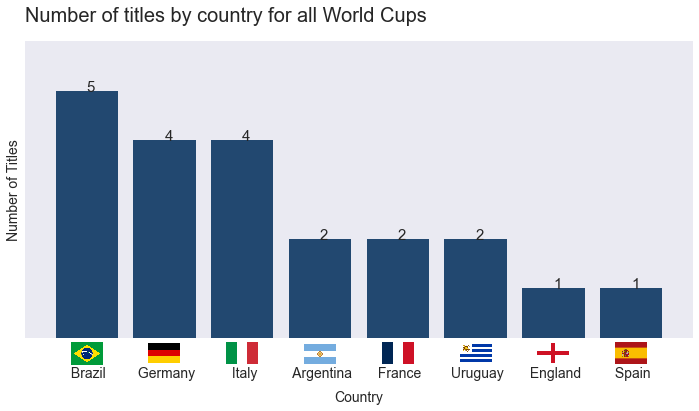

In [92]:
# bar axes
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(winners["Team"]))
ax.bar(y_pos, winners["Titles"], color="#224870")
plt.xticks(y_pos, winners["Team"])

# data labels
for i in range(len(winners["Team"])):
    ax.text(i, winners["Titles"][i], winners["Titles"][i], fontsize=15)

# aesthetics
plt.ylim(top=6)
plt.title("Number of titles by country for all World Cups", 
fontsize=20, pad=20, loc="left")
plt.xlabel("Country", fontsize=14, labelpad=10)
plt.ylabel("Number of Titles", fontsize=14)
plt.grid(False)
ax.tick_params(axis='x', which='major', pad=28)
plt.yticks([])

countries = ['Brazil', 'Germany', 'Italy', 'Argentina',
             'France', 'Uruguay', 'England', 'Spain']
countries = [c.lower() for c in countries]

# displaying country flags
for i, c in enumerate(countries):
    offset_image(i, c, ax)

plt.tight_layout()

plt.show()
